In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
SEED = 0
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [11]:
df = []
for idx in range(1, 13):
    df_tmp = pd.read_csv('kaggle/input/train{}.csv'.format(idx))
    df_tmp['Set'] = idx
    df.append(df_tmp)
df = pd.concat(df)

In [12]:
df

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),Set
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,...,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,1
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,...,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,1
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,...,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,1
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,...,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,1
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,...,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295876,90908.896,0.0,62.0600,25.1000,0.0000,0.8981,0.2018,0.5607,0.8668,0.6331,...,1.1367,1.6256,1.0065,1.0946,1.4849,2.6780,4.4780,6.0728,7.6403,12
295877,90909.204,0.0,62.0600,25.1000,0.0000,0.2119,2.1497,5.1727,7.9969,5.4928,...,8.9320,11.9270,23.7481,21.1688,23.8594,33.2957,38.4578,37.0376,45.7715,12
295878,90909.514,0.0,62.0600,25.1000,0.0000,0.2077,11.7504,23.8667,33.7225,19.7813,...,33.3141,41.1262,66.6625,55.6241,60.1967,60.7607,64.0377,58.9429,71.7899,12
295879,90909.822,0.0,62.0600,25.1000,0.0000,0.2040,34.9088,52.4949,64.1416,33.6400,...,62.4119,69.6844,73.9623,65.1843,70.3356,77.4430,73.7047,61.9316,74.9537,12


In [22]:
df_train = df[df['Set'] <= 10]
del df_train['Set']
df_train

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295386,90908.495,0.0,62.0700,25.1400,0.0000,0.2000,11.4168,5.1942,17.7458,24.8041,41.3760,39.1250,43.6371,68.9323,60.9484,63.7159,61.2250,55.4749,50.9695,71.7899
295387,90908.802,0.0,62.0700,25.1400,0.0000,0.2000,9.4421,4.0768,14.9881,24.6343,41.3760,38.9201,42.3453,65.5821,58.3888,63.2123,60.7607,56.9212,49.4775,68.9791
295388,90909.112,0.0,62.0700,25.1400,0.0000,0.1999,7.6724,3.2790,12.6389,25.1505,43.4604,37.6695,41.5249,61.5850,57.9460,63.7159,65.2954,54.7785,48.6628,67.3181
295389,90909.421,0.0,62.0700,25.1400,0.0000,0.2000,6.3318,2.7011,10.4261,23.9772,40.0465,37.3220,41.5249,68.9323,38.1529,62.7987,60.3791,57.2603,49.2201,69.4831


,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),Set
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,...,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,1
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,...,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,1
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,...,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,1
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,...,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,1
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,...,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295386,90908.495,0.0,62.0700,25.1400,0.0000,0.2000,11.4168,5.1942,17.7458,24.8041,...,39.1250,43.6371,68.9323,60.9484,63.7159,61.2250,55.4749,50.9695,71.7899,10
295387,90908.802,0.0,62.0700,25.1400,0.0000,0.2000,9.4421,4.0768,14.9881,24.6343,...,38.9201,42.3453,65.5821,58.3888,63.2123,60.7607,56.9212,49.4775,68.9791,10
295388,90909.112,0.0,62.0700,25.1400,0.0000,0.1999,7.6724,3.2790,12.6389,25.1505,...,37.6695,41.5249,61.5850,57.9460,63.7159,65.2954,54.7785,48.6628,67.3181,10
295389,90909.421,0.0,62.0700,25.1400,0.0000,0.2000,6.3318,2.7011,10.4261,23.9772,...,37.3220,41.5249,68.9323,38.1529,62.7987,60.3791,57.2603,49.2201,69.4831,10


In [75]:
COL_Y = 'CO (ppm)'
x_train = df_train[[col for col in df_train.columns if col != COL_Y]].values
y_train = df_train[COL_Y].values
x_train

array([[0.0000000e+00, 4.9753400e+01, 2.3718400e+01, ..., 5.2144000e+00,
        6.5806000e+00, 8.6385000e+00],
       [3.0900000e-01, 5.5840000e+01, 2.6620000e+01, ..., 3.4719300e+01,
        3.1750500e+01, 4.1916700e+01],
       [6.1800000e-01, 5.5840000e+01, 2.6620000e+01, ..., 5.6921200e+01,
        4.7825500e+01, 6.2943600e+01],
       ...,
       [9.0909112e+04, 6.2070000e+01, 2.5140000e+01, ..., 5.4778500e+01,
        4.8662800e+01, 6.7318100e+01],
       [9.0909421e+04, 6.2070000e+01, 2.5140000e+01, ..., 5.7260300e+01,
        4.9220100e+01, 6.9483100e+01],
       [9.0909729e+04, 6.2070000e+01, 2.5140000e+01, ..., 5.5092900e+01,
        4.8914600e+01, 6.8383700e+01]])

In [31]:
df_valid = df[df['Set'] > 10]
del df_valid['Set']
df_valid

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,32.7023,9.9032,240.8069,0.8900,0.0738,0.1314,0.0987,0.0936,0.1026,0.1152,0.1105,0.0891,0.0951,0.1083,0.1037,0.1009,0.0927,0.1009
1,0.307,0.0,45.5699,13.7998,240.8029,0.8950,0.0786,0.1286,0.1019,0.0932,0.1051,0.1129,0.1128,0.0905,0.0958,0.1103,0.1043,0.1025,0.0942,0.1020
2,0.617,0.0,58.5539,17.7318,240.7989,0.8979,0.0816,0.1287,0.1052,0.0940,0.1075,0.1128,0.1149,0.0918,0.0966,0.1119,0.1050,0.1036,0.0958,0.1028
3,0.924,0.0,71.4123,21.6256,240.7949,0.8971,0.0834,0.1303,0.1083,0.0954,0.1100,0.1138,0.1172,0.0928,0.0972,0.1130,0.1054,0.1044,0.0968,0.1033
4,1.234,0.0,83.8100,25.3800,240.7917,0.8980,0.0851,0.1324,0.1112,0.0967,0.1120,0.1151,0.1194,0.0936,0.0976,0.1138,0.1057,0.1049,0.0975,0.1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295876,90908.896,0.0,62.0600,25.1000,0.0000,0.8981,0.2018,0.5607,0.8668,0.6331,0.9859,1.1367,1.6256,1.0065,1.0946,1.4849,2.6780,4.4780,6.0728,7.6403
295877,90909.204,0.0,62.0600,25.1000,0.0000,0.2119,2.1497,5.1727,7.9969,5.4928,7.9933,8.9320,11.9270,23.7481,21.1688,23.8594,33.2957,38.4578,37.0376,45.7715
295878,90909.514,0.0,62.0600,25.1000,0.0000,0.2077,11.7504,23.8667,33.7225,19.7813,31.1327,33.3141,41.1262,66.6625,55.6241,60.1967,60.7607,64.0377,58.9429,71.7899
295879,90909.822,0.0,62.0600,25.1000,0.0000,0.2040,34.9088,52.4949,64.1416,33.6400,59.1755,62.4119,69.6844,73.9623,65.1843,70.3356,77.4430,73.7047,61.9316,74.9537


In [33]:
COL_Y = 'CO (ppm)'
x_valid = df_valid[[col for col in df_valid.columns if col != COL_Y]].values
y_valid = df_valid[COL_Y].values

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [61]:
x_valid_scaled = scaler.transform(x_valid)

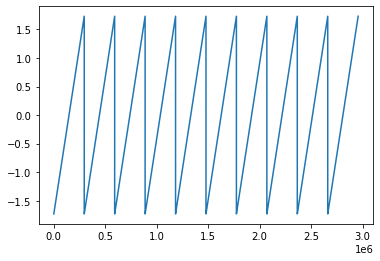

In [40]:
plt.plot(x_train_scaled[:, 0])

In [57]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[19]),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [58]:
model = build_model()

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               2560      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(x_train_scaled, y_train)

92375/92375 [==============================] - 104s 1ms/step - loss: 7.2348 - mae: 1.5054 - mse: 7.2348


In [93]:
res = model.evaluate(x_valid_scaled, y_valid)

18487/18487 [==============================] - 16s 884us/step - loss: 14.5469 - mae: 2.5356 - mse: 14.5469


In [69]:
res # mse, mae, mse?

[14.968655586242676, 2.59004282951355, 14.968655586242676]

In [70]:
df_test = pd.read_csv('kaggle/input/test_x.csv')

In [76]:
x_test = df_test.values

In [77]:
x_test

array([[0.0000000e+00, 4.8470000e+01, 2.4620000e+01, ..., 5.1818200e+01,
        4.9477500e+01, 6.3364100e+01],
       [3.0900000e-01, 4.8470000e+01, 2.4620000e+01, ..., 5.0346600e+01,
        4.9790000e+01, 6.3364100e+01],
       [6.1800000e-01, 4.8470000e+01, 2.4620000e+01, ..., 5.1539300e+01,
        5.0053300e+01, 6.5825300e+01],
       ...,
       [9.0909151e+04, 6.3940000e+01, 2.4620000e+01, ..., 7.1316000e+01,
        6.1058900e+01, 7.3678500e+01],
       [9.0909461e+04, 6.3940000e+01, 2.4620000e+01, ..., 7.4269800e+01,
        6.2418100e+01, 7.4953700e+01],
       [9.0909770e+04, 6.3940000e+01, 2.4620000e+01, ..., 6.8488200e+01,
        6.1058900e+01, 7.1789900e+01]])

In [78]:
x_test_scaled = scaler.transform(x_test)

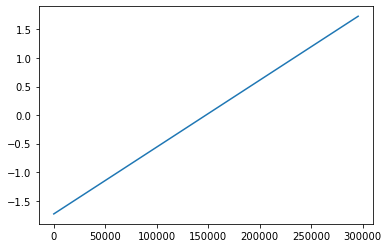

In [79]:
plt.plot(x_test_scaled[:, 0])

In [94]:
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.reshape(-1, )

In [86]:
y_pred_df = pd.DataFrame({
    'id': [i for i in range(len(y_pred))],
    'CO (ppm)': y_pred
})
y_pred_df

,id,CO (ppm)
0,0,0.021909
1,1,-0.044555
2,2,-0.302693
3,3,0.277475
4,4,0.351389
...,...,...
295612,295612,59.252728
295613,295613,56.055408
295614,295614,53.500252
295615,295615,52.079002


In [88]:
y_pred_df.to_csv('kaggle/output/baseline_dnn.csv', index=False)

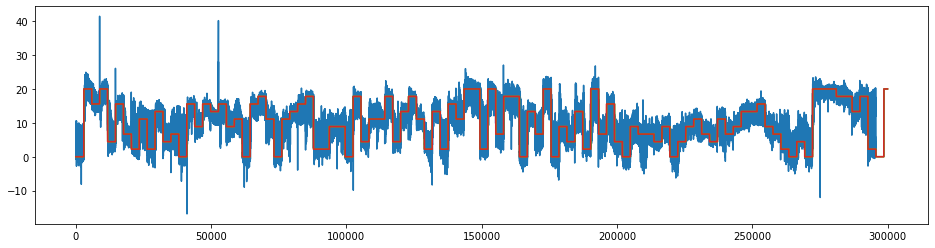

In [99]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_train[:300000])
plt.plot(y_train[:300000])
plt.plot(y_valid[:300000])

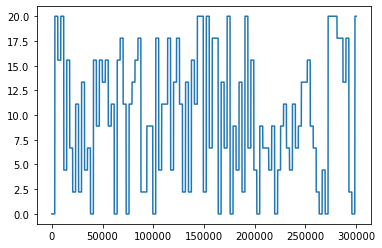